In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Базовые статистики датасета, средние, медианы, и т.д.

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
num_cols = list(df.columns)
num_cols = [i for i in num_cols if i not in ['id', 'diagnosis']]
len(num_cols)

30

Гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы


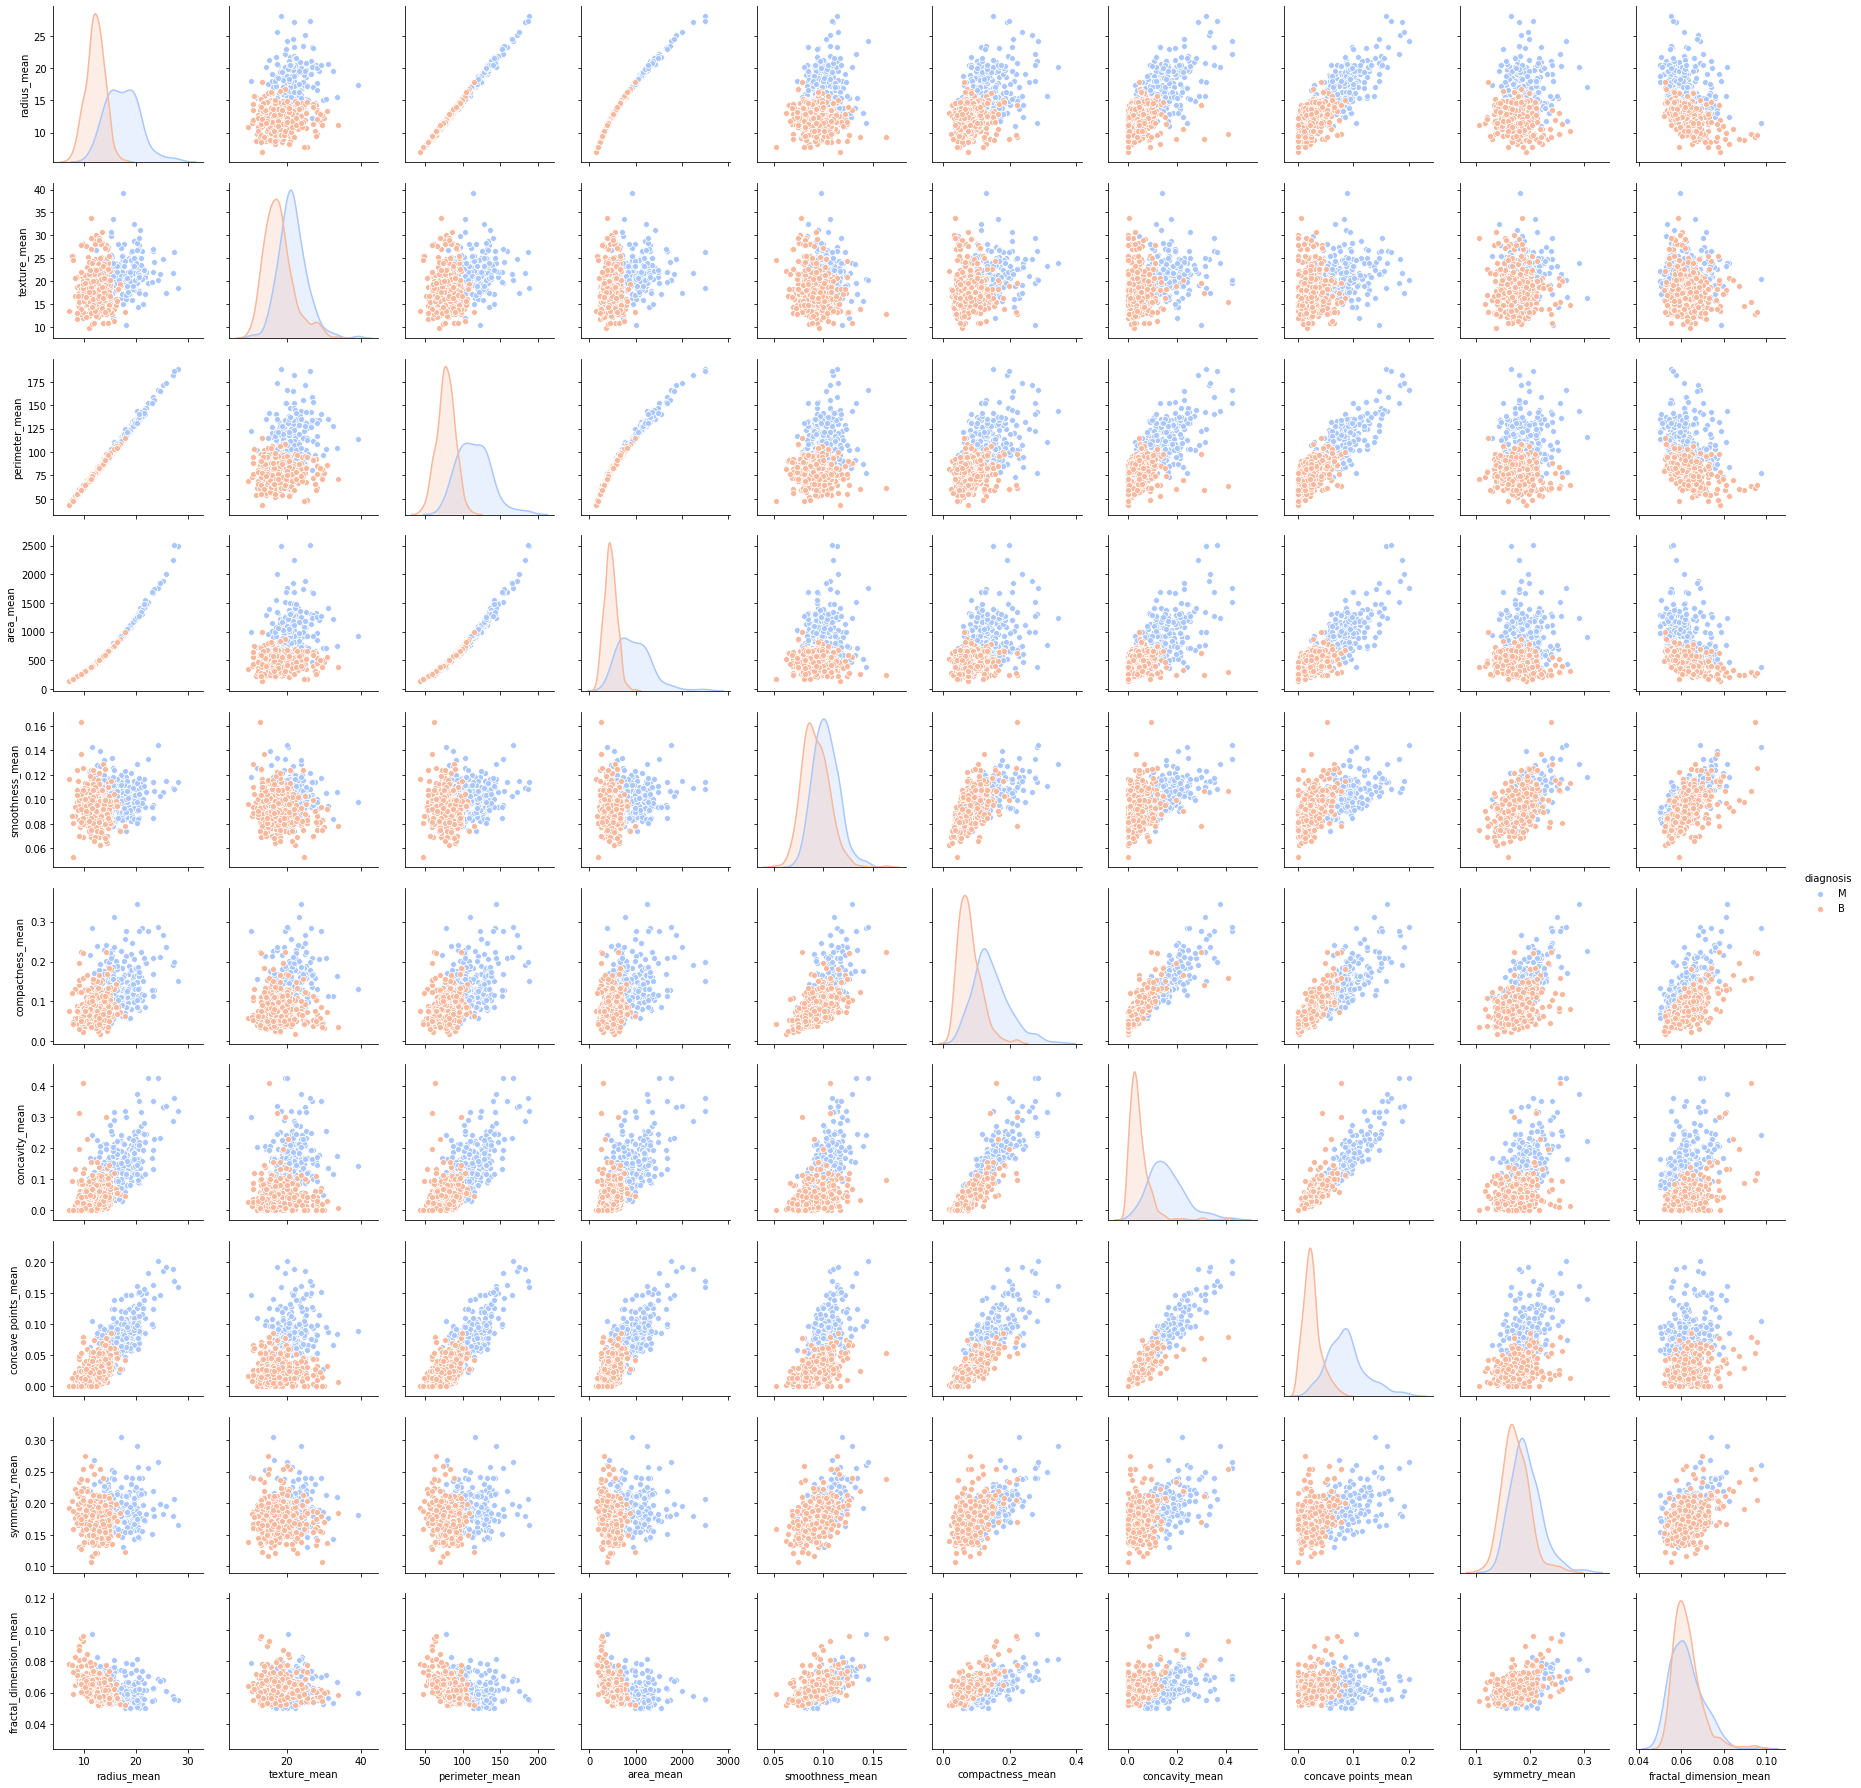

In [40]:
'''для быстрой визуализации распределения признаков построим pairplot
- для лучшей видимости строим для первых 10 признаков,
при необходимости строим аналогично для оставшихся 20 признаков'''

sns.pairplot(df[num_cols[:10]+['diagnosis']], hue='diagnosis', palette='coolwarm')

Heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки? 

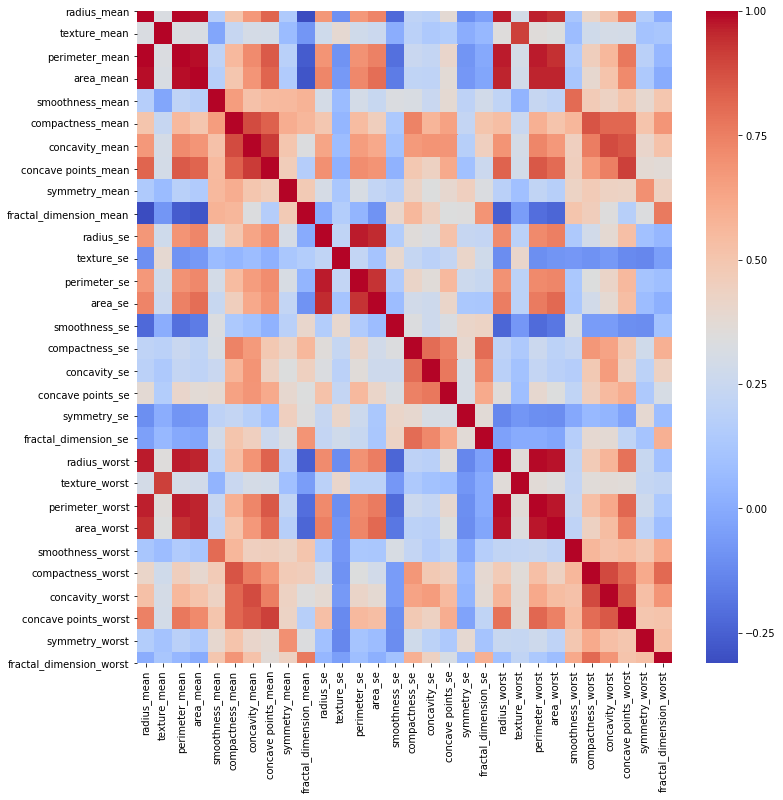

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm')

Hetmap показал, что среди 30 признаков имеются сильно скоррелированные признаки. Для удобства их выделения построим clustermap:

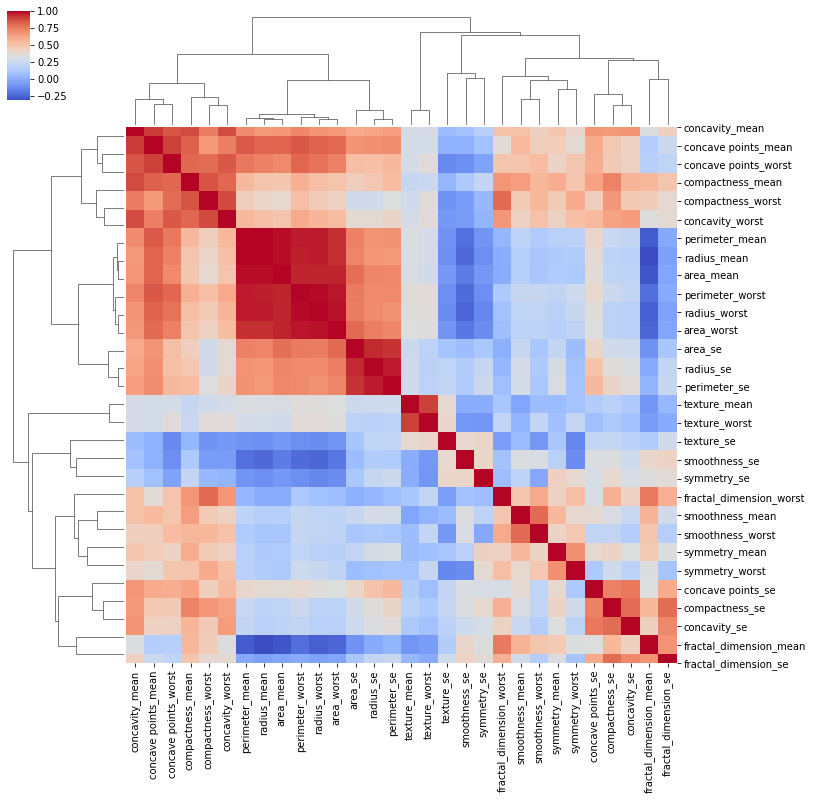

In [6]:
sns.clustermap(df[num_cols].corr(), cmap='coolwarm', figsize=(12,12))

Выделим максимально скоррелированные признаки: для коэффициента корреляции больше 0,97 нашлось 8 пар признаков - строим для них попарные scatterplot-ы:

In [44]:
df_cor = df[num_cols].corr()
df_cor = df_cor[(df_cor>0.97)&(df_cor!=1)].unstack().dropna().reset_index().\
            sort_values(0, ascending=False).drop_duplicates(subset=[0])
df_cor

,level_0,level_1,0
0,radius_mean,perimeter_mean,0.997855
9,radius_worst,perimeter_worst,0.993708
1,radius_mean,area_mean,0.987357
3,perimeter_mean,area_mean,0.986507
10,radius_worst,area_worst,0.984015
13,perimeter_worst,area_worst,0.977578
7,radius_se,perimeter_se,0.972794
4,perimeter_mean,perimeter_worst,0.970387


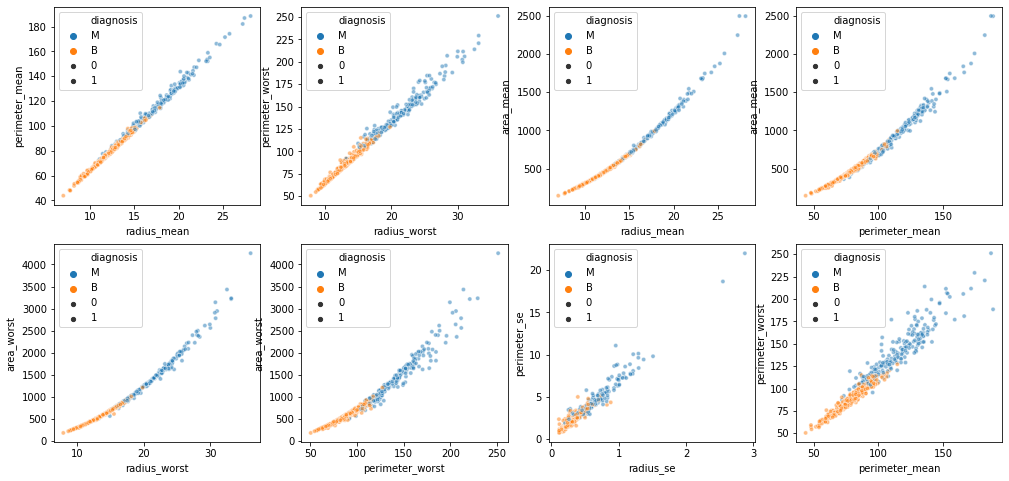

In [60]:
highly_correlated = list(zip(df_cor['level_0'], df_cor['level_1']))

fig = plt.figure(figsize=(17,8))
for i, j in enumerate(highly_correlated):
    ax = plt.subplot(2, 4, i+1)
    sns.scatterplot(x=df[j[0]], y=df[j[1]], hue=df['diagnosis'], ax=ax, size=1, alpha=0.5)

 - среди выделенных максимально скоррелированных 8 пар для 4 пар наблюдается линейная регрессия, а для других 4 пар наблюдается степенная зависимость.

_Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных_

In [92]:
order = pd.concat([df[df['diagnosis']=='M'][num_cols].median().T,
                   df[df['diagnosis']=='B'][num_cols].median().T], axis=1).reset_index()
order[2] = (order[0] - order[1]).abs()
order_list = list(order.sort_values(2, ascending=False)['index'])
order.head()

,index,0,1,2
0,radius_mean,17.3250,12.20000,5.12500
1,texture_mean,21.4600,17.39000,4.07000
2,perimeter_mean,114.2000,78.18000,36.02000
3,area_mean,932.0000,458.40000,473.60000
4,smoothness_mean,0.1022,0.09076,0.01144


<br>Для упрощения идентификации оптимальных признаков для идентицикации целефой переменной строим boxplot-ы в порядке убывания дельты между медианами пар признаков.
<br>Многие признаки имеют хорошо разделенные распределения, то есть когда ящики между 1ым и 3им квантилями не перекрываются.

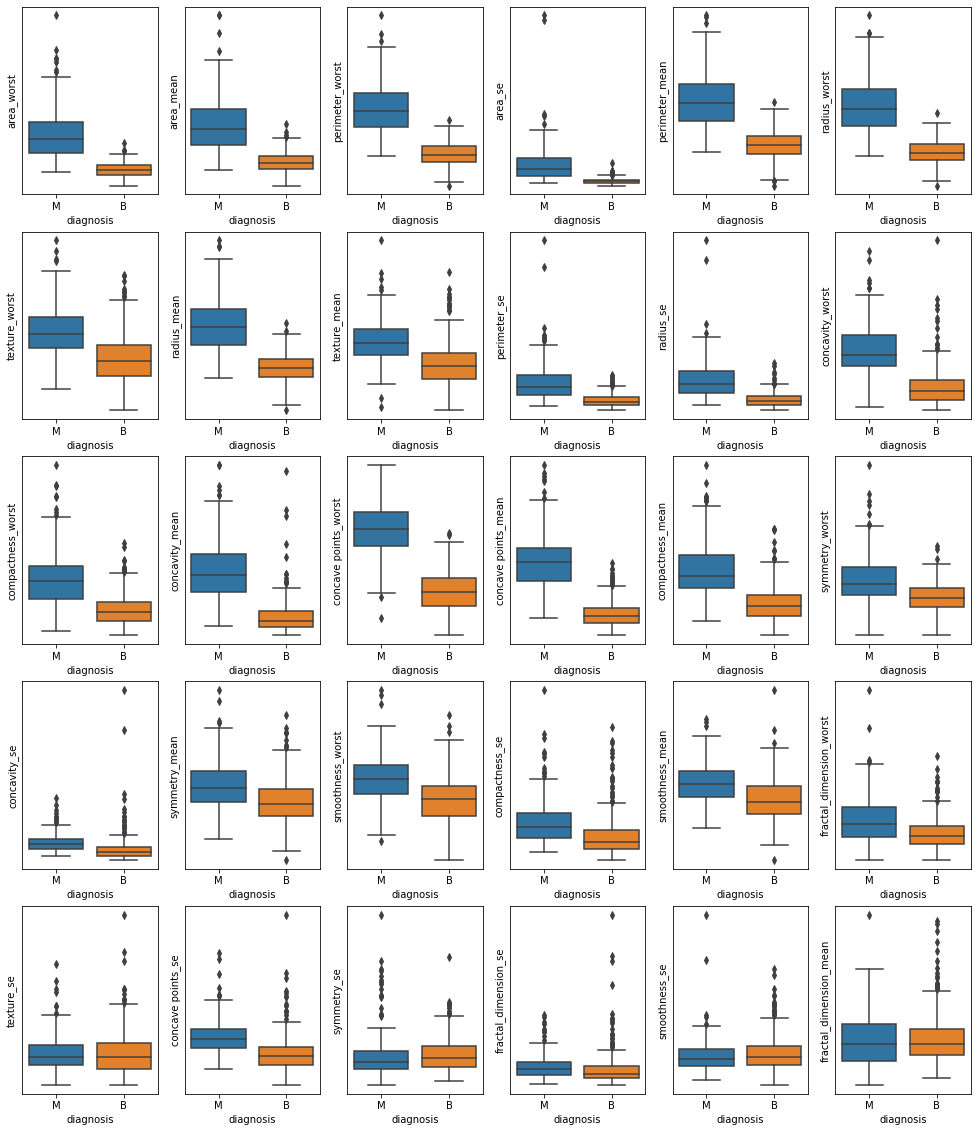

In [94]:
fig = plt.figure(figsize=(17, 20))
for i, j in enumerate(order_list):
    ax = plt.subplot(5, 6, i+1)
    sns.boxplot(x='diagnosis', y=j, data=df, ax=ax)
    plt.yticks([])

<br>Приведенные на графике выше последние 11 признаков имеют перекрытие распределений в большей степени - такие признаки не позволяют уверенно идентифицировать целевую переменную. Построим для них violinplot, чтобы оценить форму распределния:

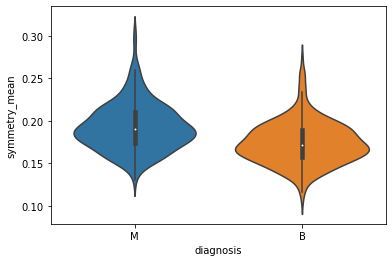

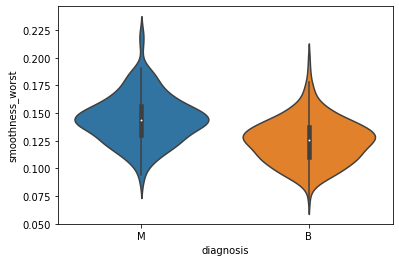

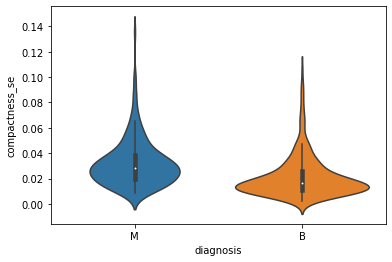

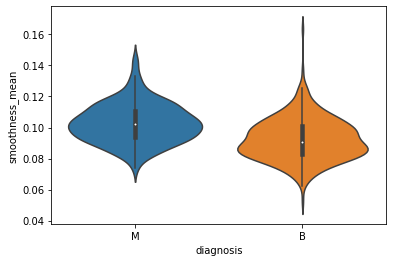

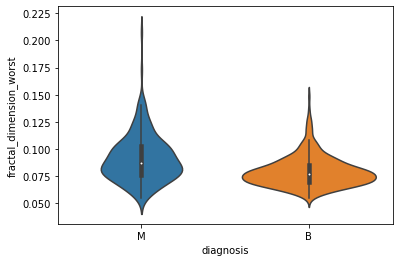

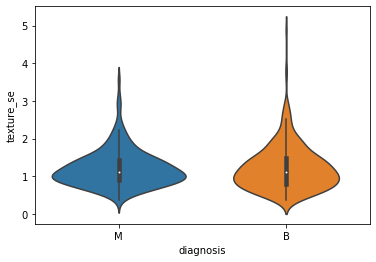

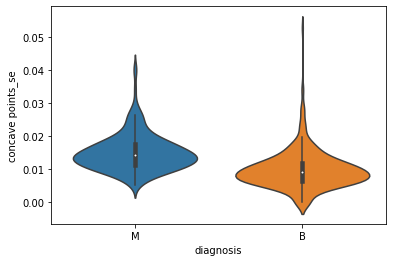

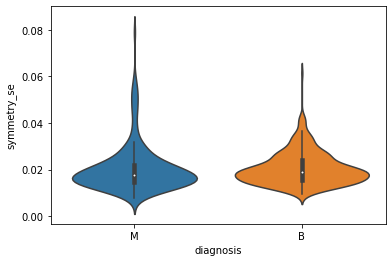

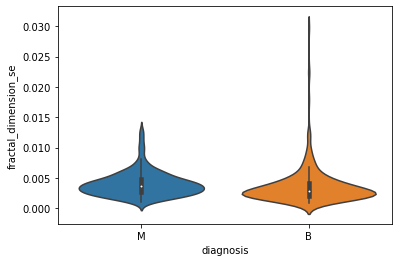

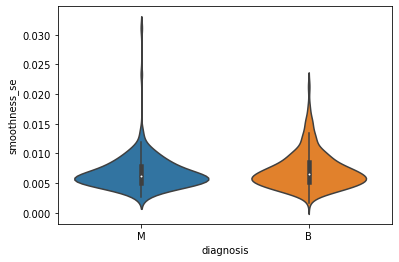

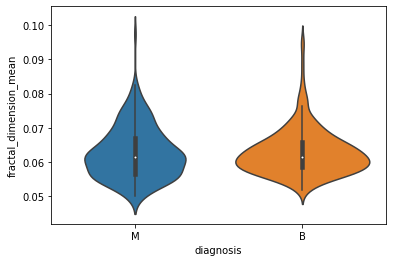

In [98]:
for i in order_list[-11:]:
    plt.figure()
    sns.violinplot(df['diagnosis'], df[i])